#### Analisis de datos

#### Benjamin Elias Arroyo Marquez

#### K-means

#### Grupo: 11

#### Tutora: Sandra Milena Patino 

In [2]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargue de los datos del dataset 
Datos = pd.read_csv('C:/UNAD/Mall_Customers.csv')

In [6]:
# Lectura de los primeros 30 datos 
Datos.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
# Visualización de las dimensiones del dataset (filas, columnas)
Datos.shape

(200, 5)

In [12]:
# Eliminar la columna 'Gender' del dataset 
data=Datos.drop(['Gender'], axis=1)

In [14]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [16]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# Conteo de valores faltantes por columna
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
# Eliminación de filas que contienen valores faltantes
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


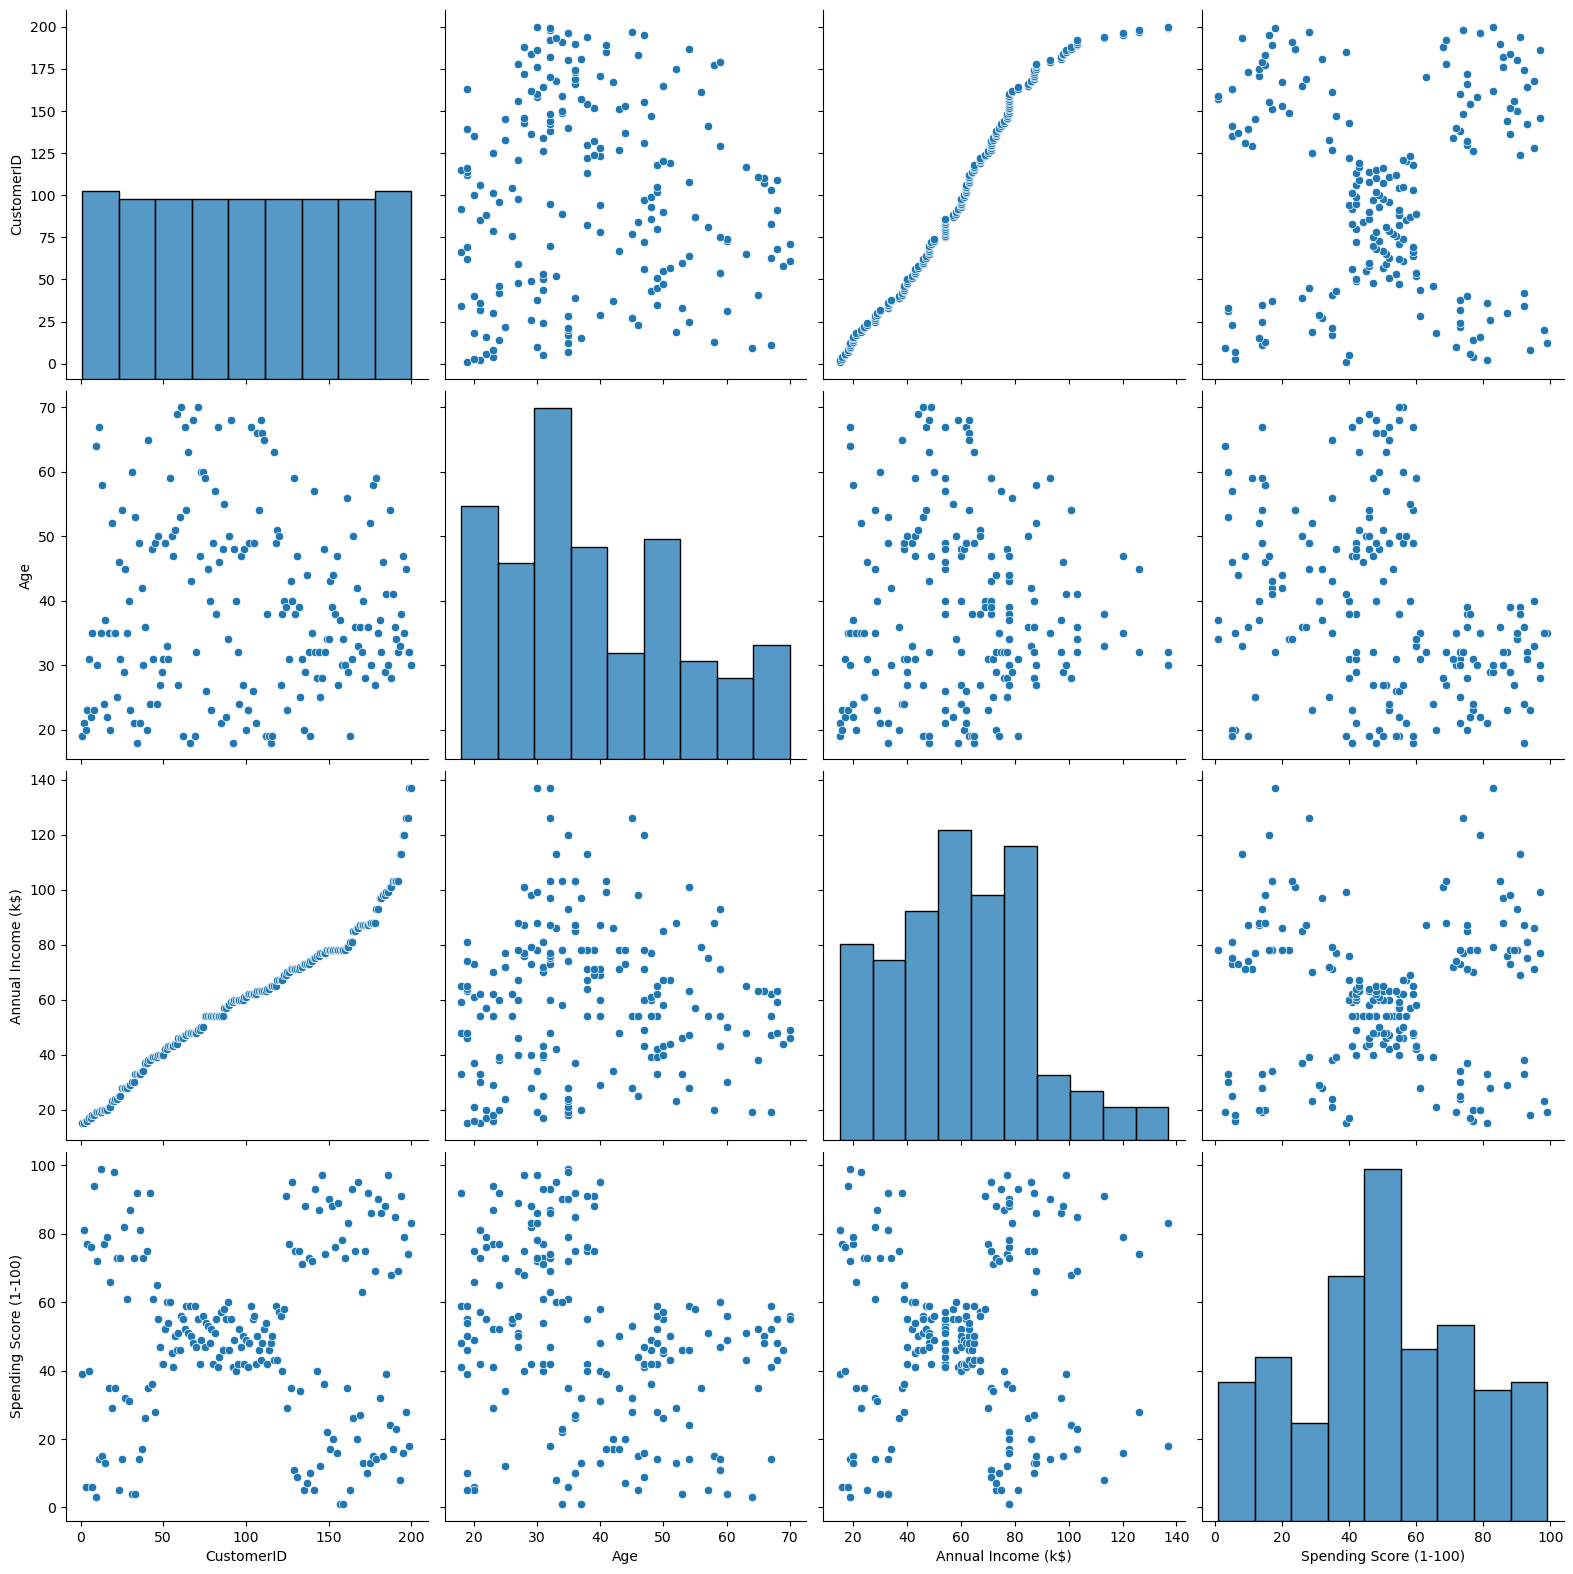

In [22]:
# Visualización de relaciones entre variables numéricas usando gráficos de dispersión 
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [24]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

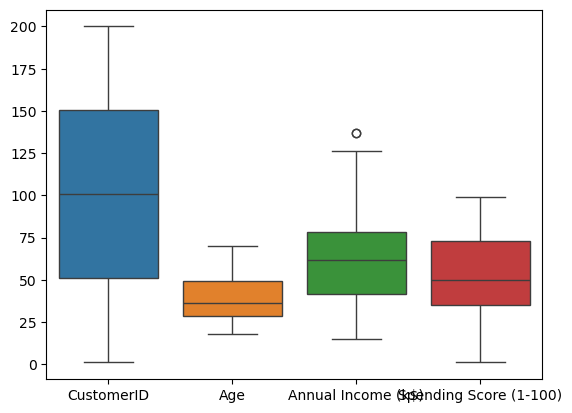

In [26]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [28]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## K-MEANS

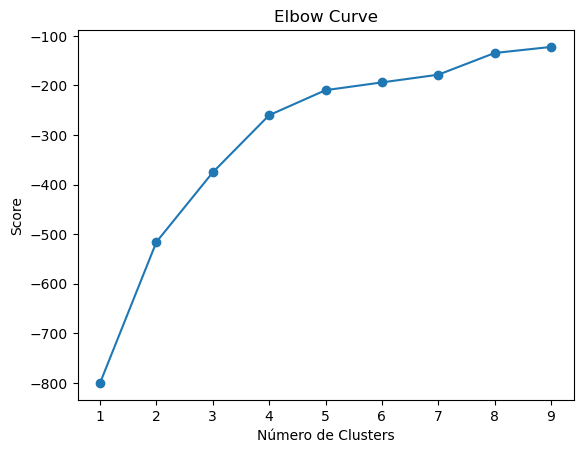

In [31]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.03142803, -0.43908961,  0.95706585,  1.1919166 ],
       [-0.52769496,  1.16024842, -0.46970394, -0.31965278],
       [-0.87036641, -0.90904474, -0.83756451,  0.28792658],
       [ 1.02668595,  0.10226753,  0.96816757, -1.18211652]])

In [35]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

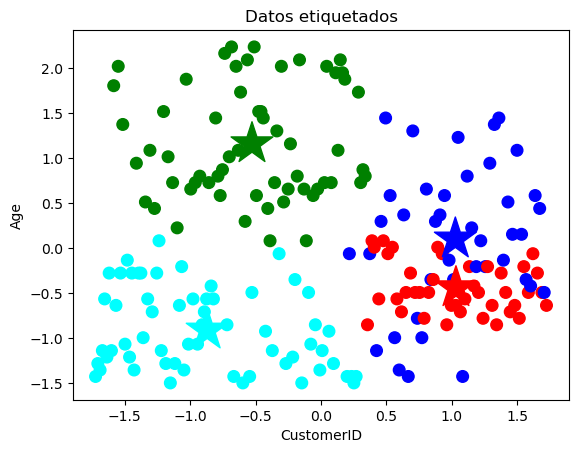

In [39]:
f1 = X['CustomerID'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

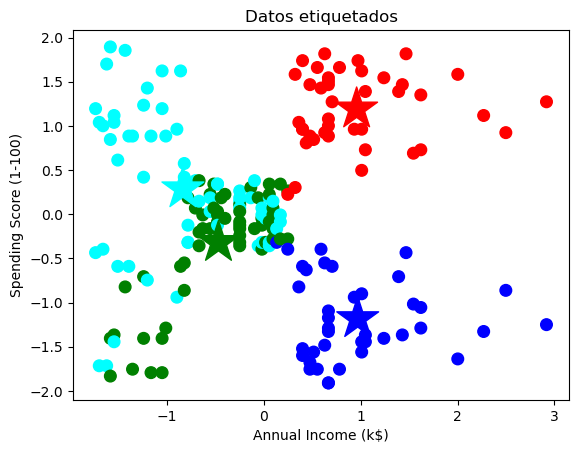

In [41]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

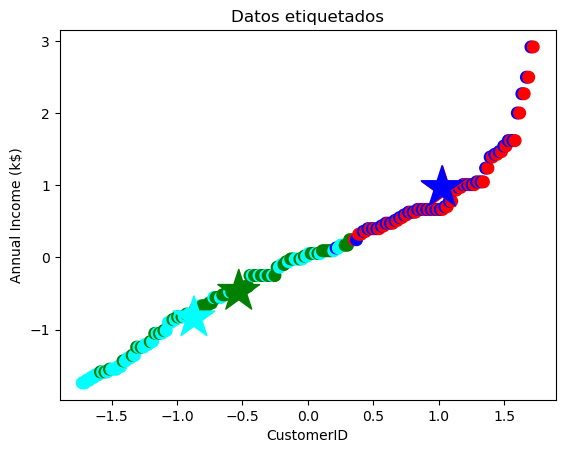

In [43]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

In [47]:
X_new = scaler.transform(np.array([[26, 65, 72, 1234]]))
new_label = kmeans.predict(X_new)
color = []
for row in new_label:
    color.append(colores[row]) 
print(new_label)
print(color)

[0]
['red']


In [49]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.41358360614845524
Índice de Calinski-Harabasz: 135.9199278402295
Inertia (suma de cuadrados dentro de los clusters): 259.70593649954003
Davies-Bouldin Index: 0.907561061848594


### Interpretación de resultados

•	Puntaje de silueta: el puntaje de silueta está definido en un rango de -1 a 1. Si el resultado de nuestro puntaje se acerca a 1, significa que los puntos están bien agrupados y separados de otros clusters, si se acerca al 0, significa que los puntos están en el límite entre dos clusters y, por último, si se obtiene un resultado negativo, indica una mala asignación de puntos. En este caso el valor es de 0.4135 moderado, lo que sugiere que los clusters están medianamente bien definidos, pero podría haber solapamiento entre algunos.

•	Índice de Calinski-Harabasz: este mide la separación entre clusters y la compacidad interna. Cuanto más alto sea su resultado, mejor. En este caso el valor es de 135.91 el cual es bueno para el caso del dataset trabajado, ya que nos indica que los clusters están bien separados y tienen coherencia interna.

•	Inercia: esta es la suma de las distancias cuadradas de los puntos a su centroide más cercano, cuanto más bajo sea su resultado mejor. En este caso el valor es de 259.7 lo que sugiere que los puntos están relativamente cerca de sus centroides, lo que es bueno.

•	Índice de Davies-Bouldin (Davies-Bouldin Index): este mide la separación entre clusters, va de 0 hacia arriba; un resultado más bajo indica mejor separación entre los clusters. En este caso el valor es de 0.9075 está por debajo de 1 lo que generalmente se considera una buena separación entre clusters.
